In [1]:
%matplotlib inline
import torch
import torchvision
from IPython import display
from torchvision import transforms
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [3]:
def angle(v: torch.Tensor, w: torch.Tensor):
  return torch.acos(v.dot(w) / (torch.norm(w) * torch.norm(v)))

angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4]))  

tensor(0.4190)

In [6]:
trans = [] # steps of transformation
trans.append(transforms.ToTensor())

trans

[ToTensor()]

In [7]:
trans = transforms.Compose(trans)

trans

Compose(
    ToTensor()
)

In [10]:
train = torchvision.datasets.FashionMNIST(root="../data",
                                          transform=trans,
                                          train=True,
                                          download=True)
test = torchvision.datasets.FashionMNIST(root="../data",
                                         transform=trans,
                                         train=False,
                                         download=True)

100.0%


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



In [16]:
train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [17]:
X_train_0 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 0]).type(torch.float32)

X_train_1 = torch.stack(
    [x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)

X_test = torch.stack(
    [x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)

y_test = torch.stack([torch.tensor(x[1]) for x in test
                      if x[1] == 0 or x[1] == 1]).type(torch.float32)

In [19]:
X_train_0.shape

torch.Size([6000, 1, 28, 28])

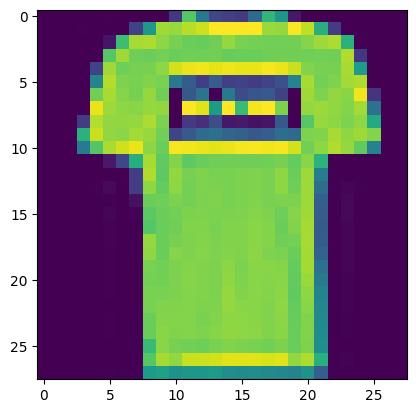

In [24]:
plt.imshow(X_train_0[0][0])

In [27]:
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)

In [29]:
ave_0.shape

torch.Size([1, 28, 28])

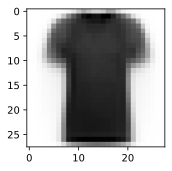

In [30]:
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

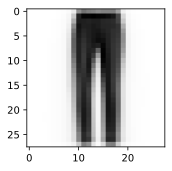

In [31]:
# Plot average trousers
d2l.plt.imshow(ave_1.reshape(28, 28).tolist(), cmap='Greys')
d2l.plt.show()

In [32]:
w = (ave_1 - ave_0).T

w.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_15680\3040076083.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3687.)
  w = (ave_1 - ave_0).T


torch.Size([28, 28, 1])

In [33]:
# '@' is Matrix Multiplication operator in pytorch.
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -1500000

# Accuracy
torch.mean((predictions.type(y_test.dtype) == y_test).float(), dtype=torch.float64)

tensor(0.7870, dtype=torch.float64)

In [34]:
M = torch.tensor([[1, 2], [1, 4]], dtype=torch.float32)
M_inv = torch.tensor([[2, -1], [-0.5, 0.5]])
M_inv @ M

tensor([[1., 0.],
        [0., 1.]])

In [35]:
# Define tensors
B = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
A = torch.tensor([[1, 2], [3, 4]])
v = torch.tensor([1, 2])

# Print out the shapes
A.shape, B.shape, v.shape

(torch.Size([2, 2]), torch.Size([2, 2, 3]), torch.Size([2]))

In [37]:
torch.einsum("ij, j -> i", A, v), A@v

(tensor([ 5, 11]), tensor([ 5, 11]))

In [38]:
torch.einsum("ijk, il, j -> kl", B, A, v)

tensor([[ 90, 126],
        [102, 144],
        [114, 162]])

### Exercises

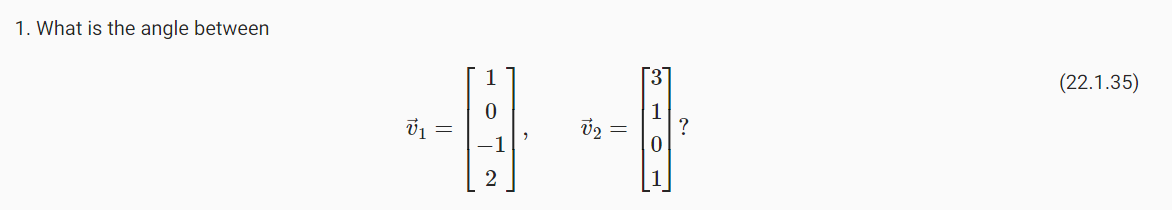

In [3]:
v1 = torch.tensor([1, 0, -1, 2], dtype=torch.float64)
v2 = torch.tensor([3, 1, 0, 1], dtype=torch.float64)

v_dot = v1.dot(v2)
v1_norm = torch.norm(v1)
v2_norm = torch.norm(v2)

v_angle = torch.acos(v_dot / (v1_norm * v2_norm))
v_angle

tensor(0.9078, dtype=torch.float64)

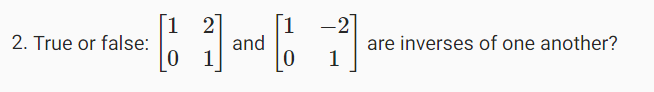

In [7]:
A = torch.tensor([
  [1, 2],
  [0, 1]
])

B = torch.tensor([
  [1, -2],
  [0, 1]
])

A @ B

tensor([[1, 0],
        [0, 1]])

True, because $AA^{-1}$ must equal $I$

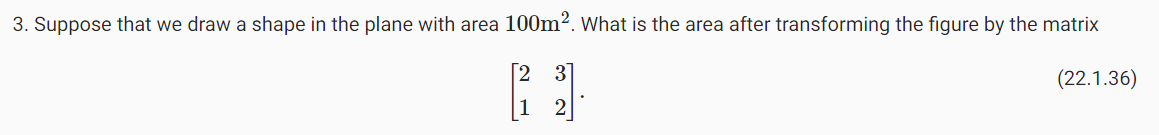

Let`s see how this matrix modifies the area of 1 piece

In [9]:
A = torch.tensor([
  [2, 3],
  [1, 2]
], dtype=torch.float64)

det = torch.det(A)
det

tensor(1.0000, dtype=torch.float64)

We see that after transformation of matrix - area keeps the same, so we can say that area of that shape on a plane will be $100m^2$

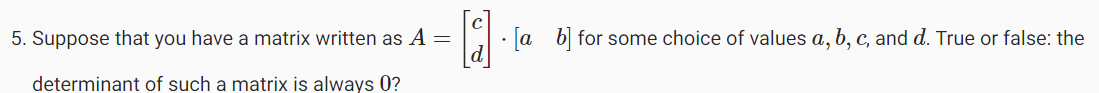

No matter what those numbers are, all times we will get dot product(scalar) as a matrix A, and since this is a value - we can not have an area of a value - so the determinant is zero